In [834]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [835]:
import warnings
warnings.filterwarnings('ignore')

In [836]:
import statsmodels.api as sm #train and test model
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF

In [837]:
# Scikit Packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [838]:
import datetime
import os
from scipy.stats import pearsonr

### Read CSV File and form Dataset

In [839]:
boombike_df = pd.read_csv(r"C:\root\upGrad\DS47\Machine_Learning\LR Task\day.csv", index_col='instant')

### inspecting dataframe

In [840]:
boombike_df.shape

(730, 15)

In [841]:
boombike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [842]:
boombike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


#### No missing Data

### Data Cleaning

#### dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

### Season

In [843]:
boombike_df.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

Season column is categorical column with each value corresponding to specific season.

    1: spring
    2: summer
    3: fall
    4: winter


In [844]:
boombike_df['season'] = boombike_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [845]:
def bar_graph_plot(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

In [846]:
season_grp = boombike_df.groupby(by='season').cnt.mean().sort_values()

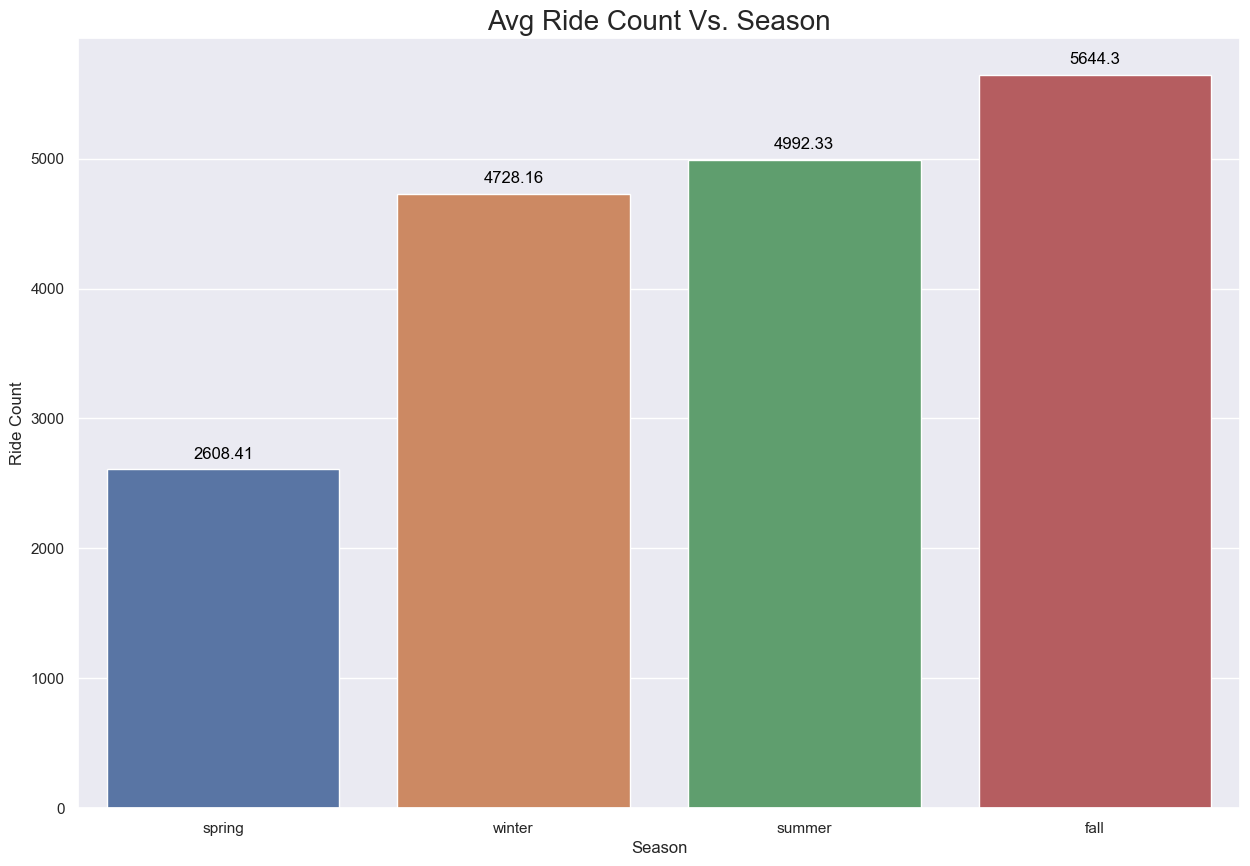

In [847]:
bar_graph_plot(data=season_grp, graph_title='Avg Ride Count Vs. Season', x_axis_label='Season',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

### fall has better avg ride.

### Month

In [848]:
month_grp = boombike_df.groupby(by='mnth').cnt.mean()

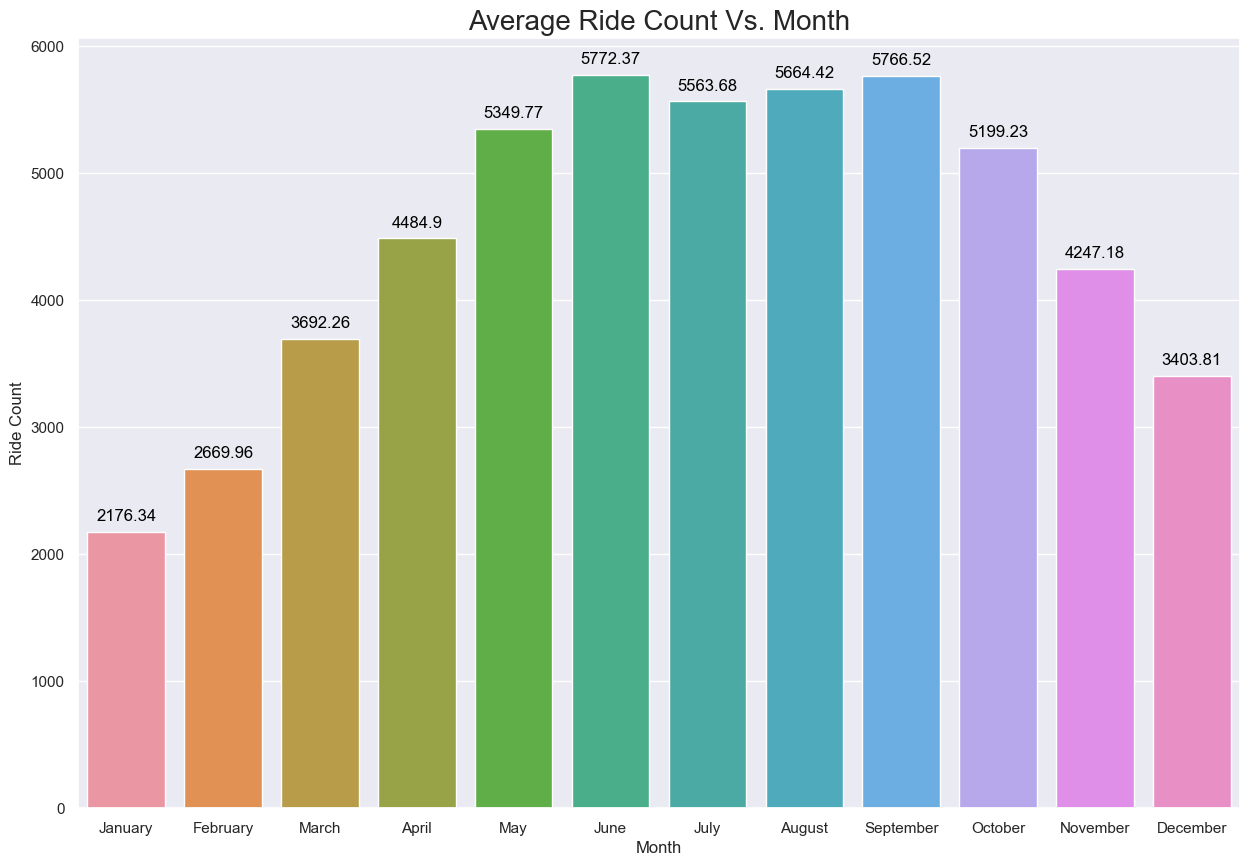

In [849]:
bar_graph_plot(data=month_grp, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

- We have decent ride on April and November
- Rider is consistent and more from May to October

### Year Distribution 2018 - 2019
2018 - 0 <br>
2019 - 1

In [850]:
year_grp = boombike_df.groupby(by='yr').cnt.mean()

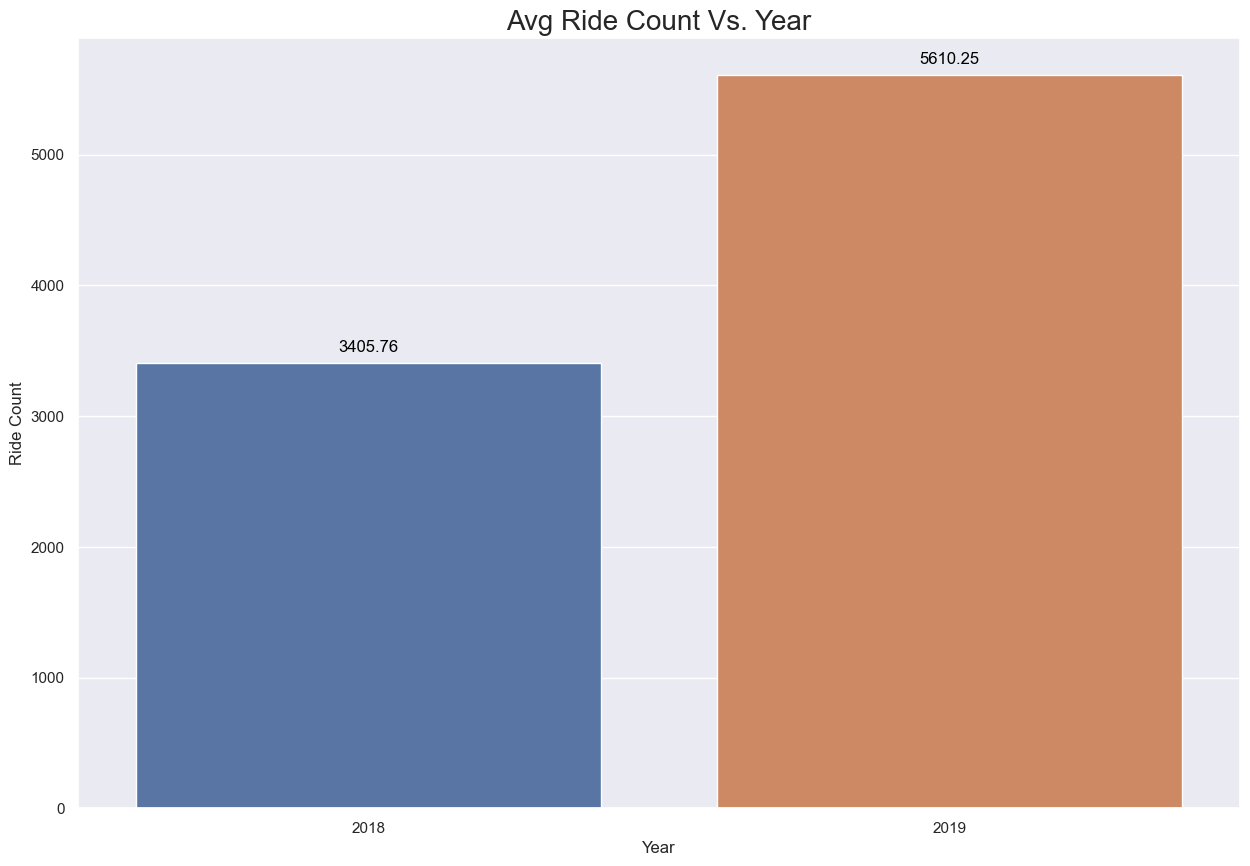

In [851]:
bar_graph_plot(data=year_grp, graph_title='Avg Ride Count Vs. Year', x_axis_label='Year',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text=['2018', '2019'])

### Holiday

In [852]:
holiday_group = boombike_df.groupby(by='holiday').cnt.mean()

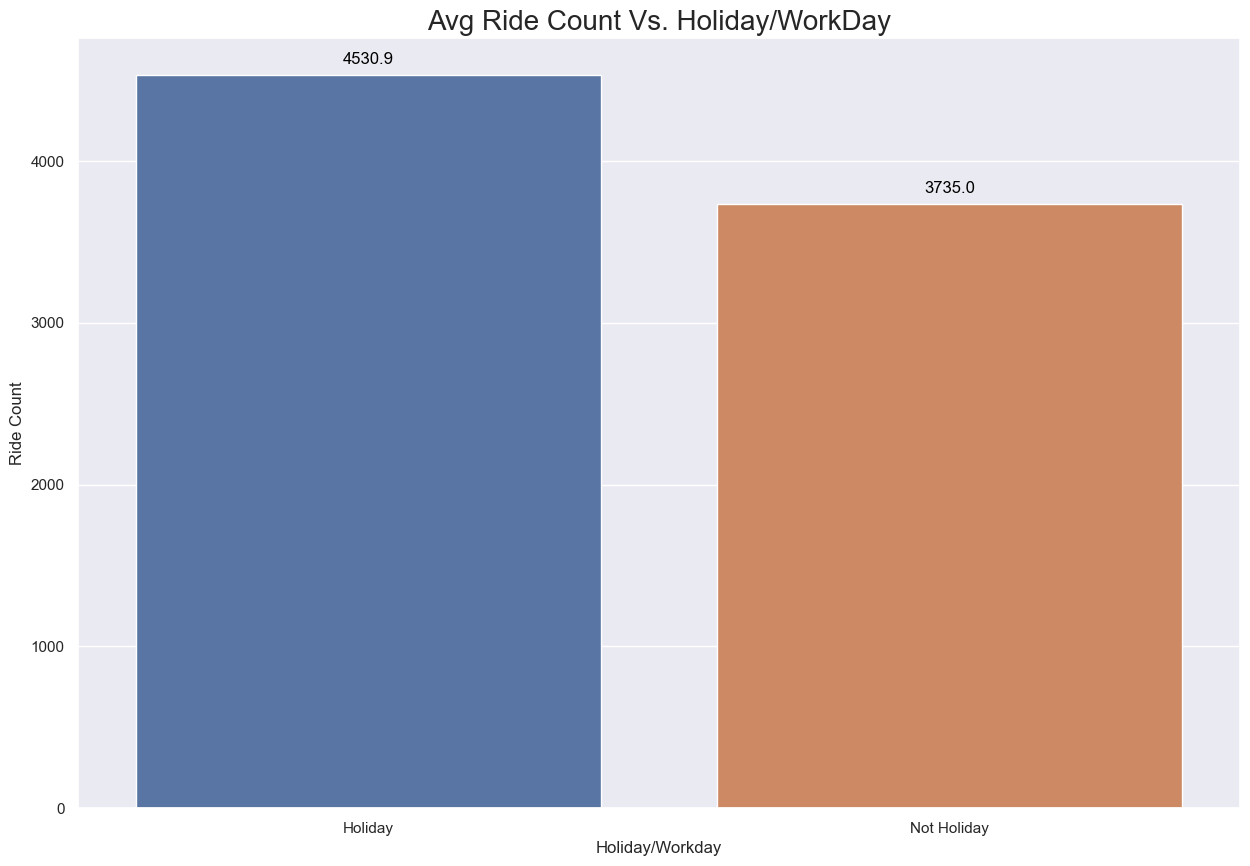

In [853]:
bar_graph_plot(data=holiday_group, graph_title='Avg Ride Count Vs. Holiday/WorkDay', x_axis_label='Holiday/Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Holiday', 'Not Holiday'])

We have more ride on Holiday

In [854]:
### WeekDay

In [855]:
weekday_dist = boombike_df.groupby(by='weekday').cnt.mean()

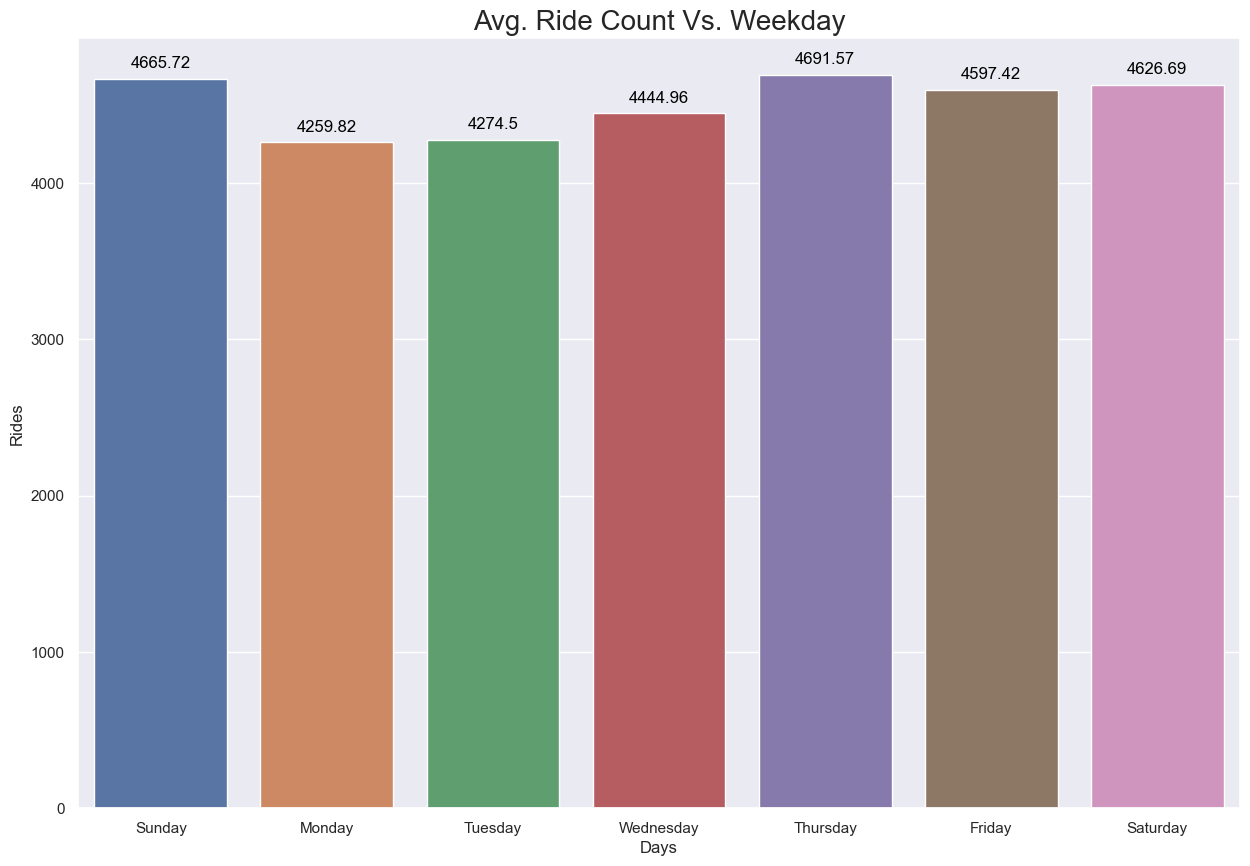

In [856]:
bar_graph_plot(data=weekday_dist, graph_title='Avg. Ride Count Vs. Weekday', x_axis_label='Days',
                        y_axis_label='Rides', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [857]:
boombike_df.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

instant
1         monday
2        tuesday
3      wednesday
4       thursday
5         friday
         ...    
726       friday
727     saturday
728       sunday
729       monday
730      tuesday
Name: weekday, Length: 730, dtype: object

In [858]:
boombike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [859]:
workingday_group = boombike_df.groupby(by='workingday').cnt.mean()

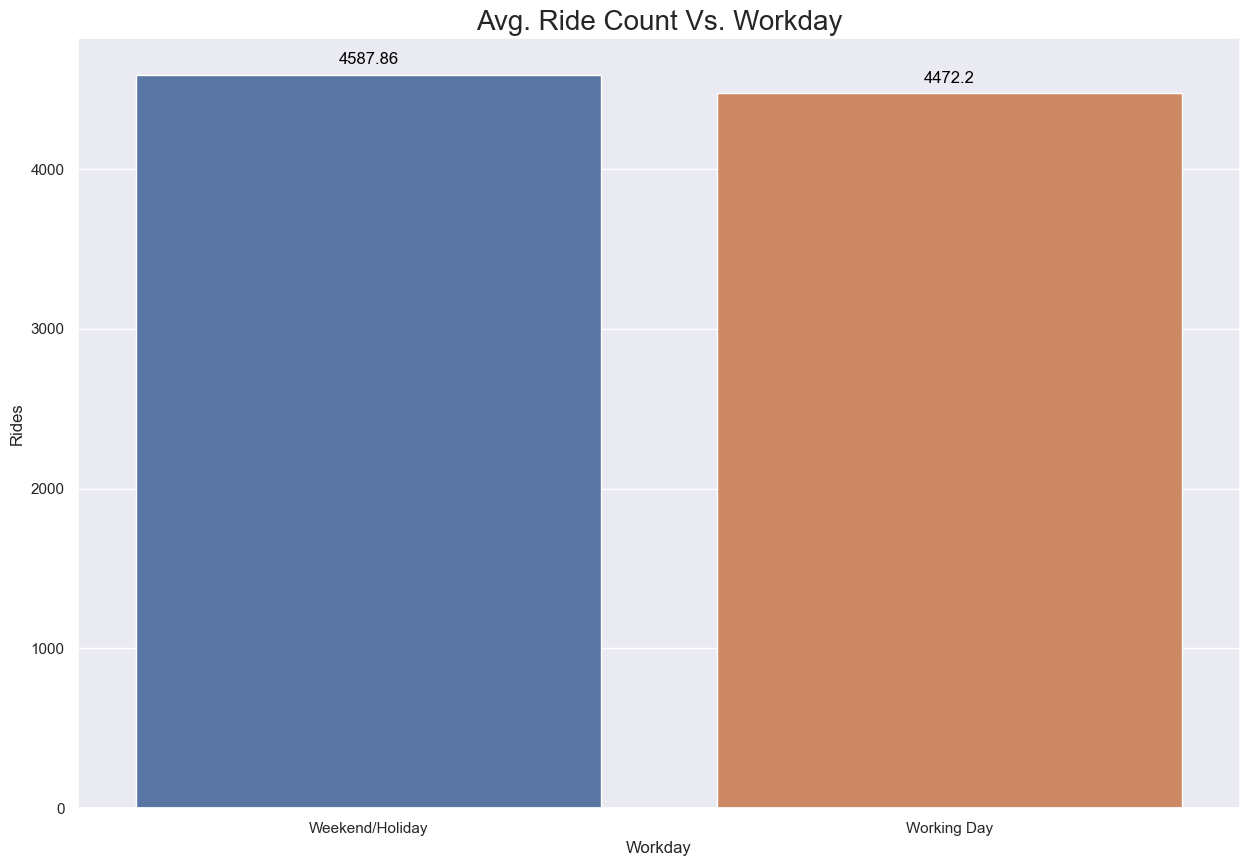

In [860]:
bar_graph_plot(data=workingday_group, graph_title='Avg. Ride Count Vs. Workday', x_axis_label='Workday',
                        y_axis_label='Rides', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Weekend/Holiday', 'Working Day'])

### weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [861]:
boombike_df.groupby(by='weathersit').weathersit.count()

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

There is no Heavy rain

In [862]:
weathersit_grp_df = boombike_df.groupby(by='weathersit').cnt.mean()

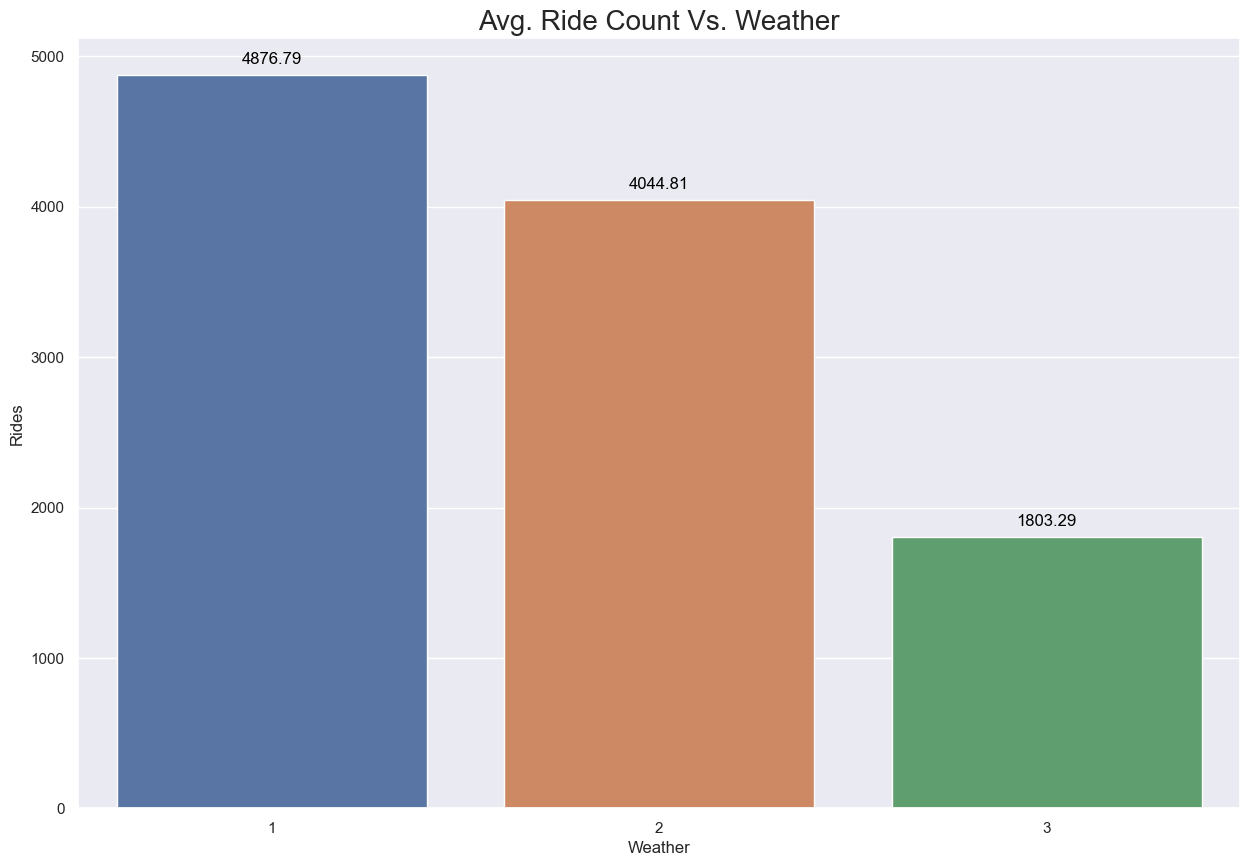

In [863]:
bar_graph_plot(data=weathersit_grp_df, graph_title='Avg. Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Rides', data_label='horizontal', x_label_rotation=0)

### temp vs atemp

In [864]:
pd.DataFrame(np.corrcoef(boombike_df['temp'], boombike_df["atemp"])) 

,0,1
0,1.000000,0.991696
1,0.991696,1.000000


Both are highly correlated. Only one column analysis is sufficient

<AxesSubplot:xlabel='temp'>

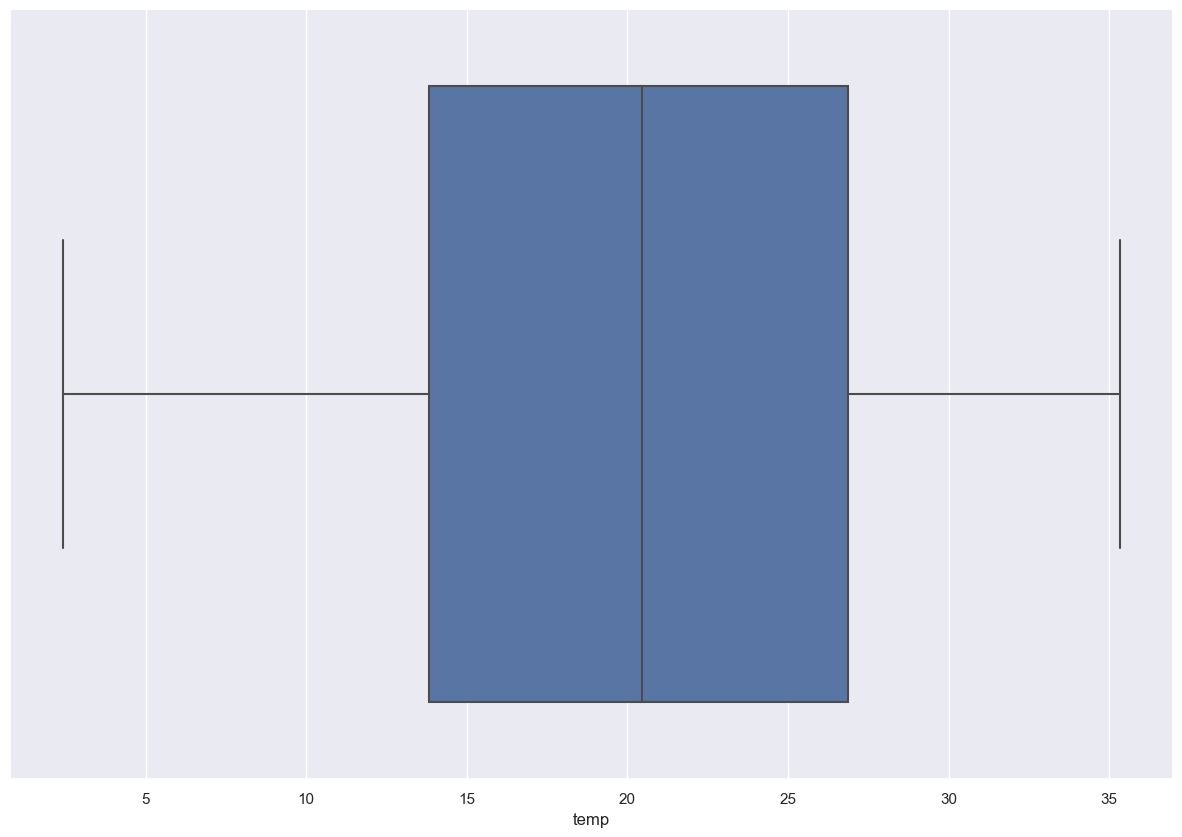

In [865]:
sns.boxplot(data=boombike_df, x='temp')

temp varies from valid range

In [866]:
boombike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


### humidity


In [867]:
boombike_df.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

boombike_df.hum  min shows 0 which seems incorrect, can replace with median value

In [868]:
median_value = boombike_df.hum.median()
median_value

62.625

### Pair plot

In [869]:
pair_plot = pd.read_csv(r"C:\root\upGrad\DS47\Machine_Learning\LR Task\day.csv", index_col='instant')
pair_plot['yr'] = pair_plot['yr'].map({0: 2018, 1:2019})
pair_plot = boombike_df.drop(columns=['atemp', 'casual', 'registered'])
pair_plot.at[int(pair_plot[pair_plot['hum'] == 0.0].hum.index.values), "hum"] = median_value

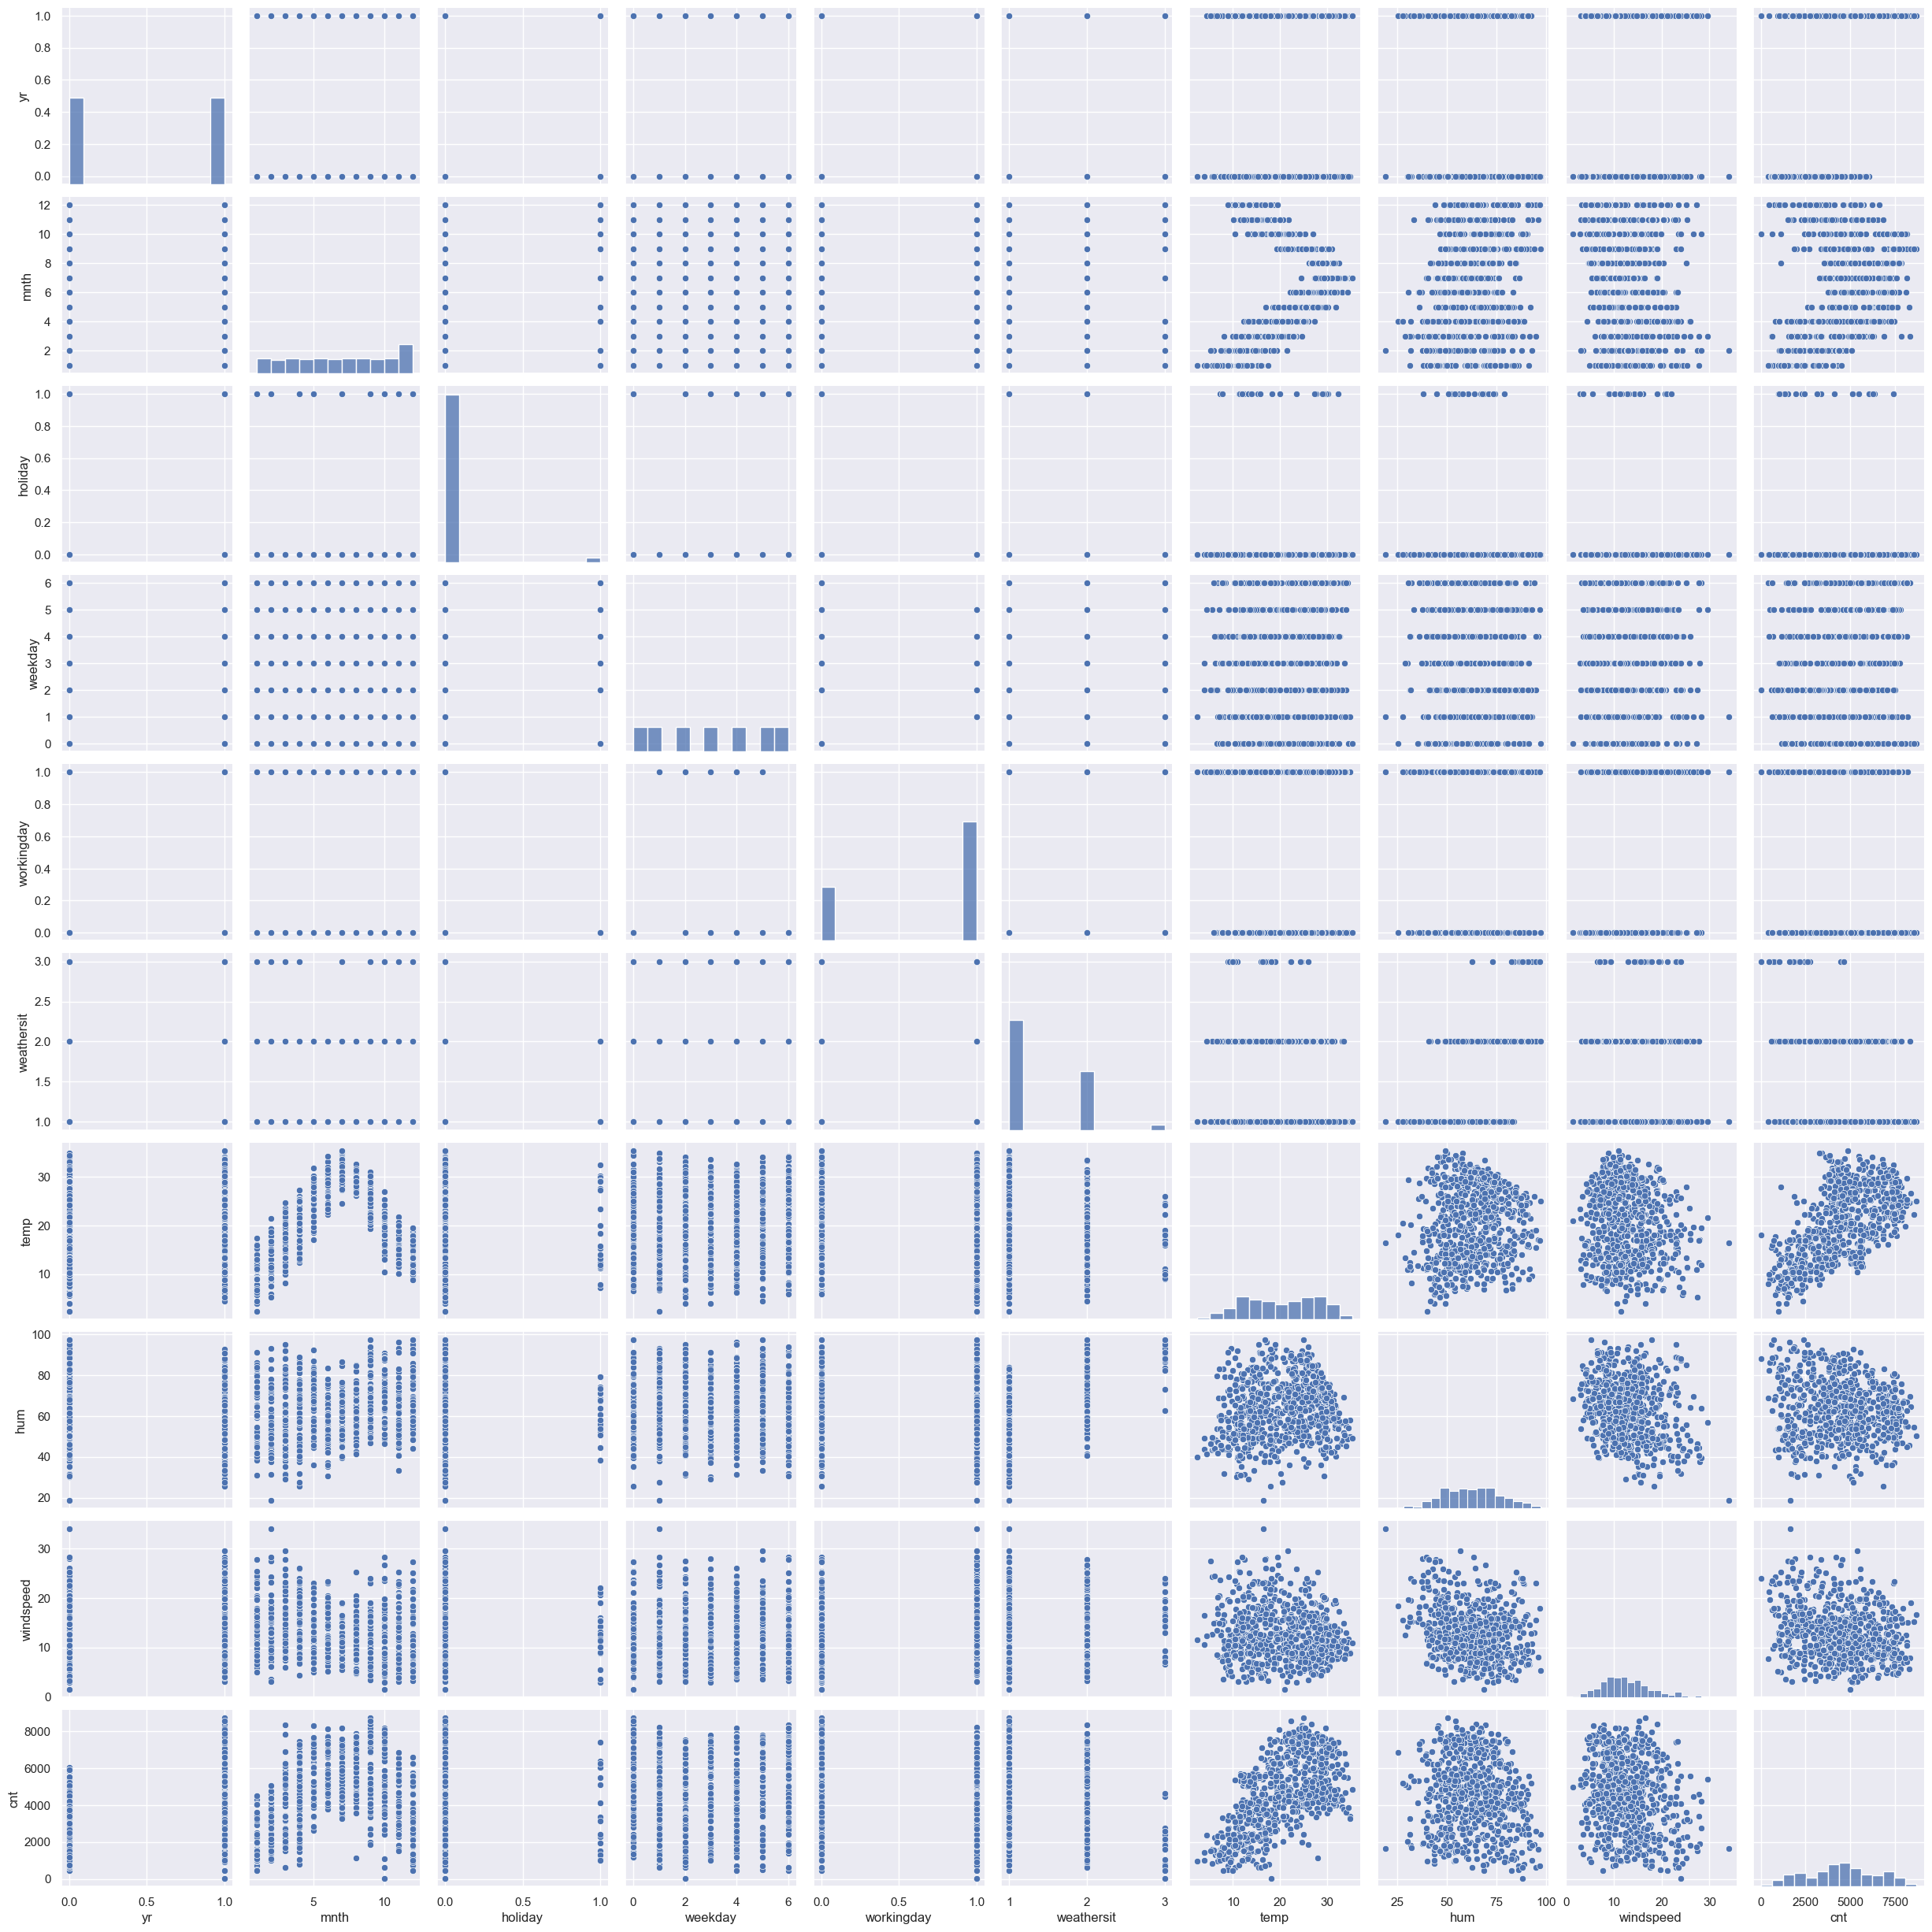

In [870]:
sns.pairplot(pair_plot)

- Less ride count on higher windspeed
- ride cnt seems varying with temp

### Data Transformation

In [871]:
boombike_df['weathersit'] = boombike_df.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})
boombike_df['weekday'] = boombike_df.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})


boombike_df.mnth = boombike_df.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))



In [872]:
dummy_var_col = ['mnth', 'season', 'weekday', 'weathersit']

In [873]:
dummy_var = pd.get_dummies(boombike_df[dummy_var_col], drop_first=True)
boombike_df = boombike_df.drop(columns=dummy_var_col)

In [874]:
boombike_df = pd.concat([boombike_df, dummy_var], axis=1)

In [875]:
boombike_df.head()
boombike_df['yr'].head()

instant
1    0
2    0
3    0
4    0
5    0
Name: yr, dtype: int64

### Data Splitting

70-30% splitting.

In [876]:
boombike_df['dteday'] = boombike_df['dteday'].apply(lambda x: int(x.split('-')[0]))
boombike_df = boombike_df.rename(columns={"dteday": "date"})            
#drop atemp, atemp and temp highly correlated
boombike_df.drop('atemp', inplace=True, axis=1)
boombike_df = boombike_df.drop(columns=['casual', 'registered'])

In [877]:

df_train, df_test = train_test_split(boombike_df, train_size=0.7, random_state=100)

In [878]:
df_train.shape, df_test.shape, boombike_df.shape

((510, 30), (220, 30), (730, 30))

### Data Transformation

In [879]:
numerical = ['temp', 'hum', 'windspeed', 'cnt', 'date']

In [880]:
scaler = MinMaxScaler()

In [881]:
df_train[numerical] = scaler.fit_transform(df_train[numerical])
df_train.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
577,1.000000,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
427,0.066667,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
729,0.966667,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
483,0.900000,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1
112,0.700000,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,1
581,0.100000,1,0,0,0.914852,0.632030,0.462538,0.782559,1,0,...,0,0,0,0,1,0,0,0,0,0
501,0.500000,1,0,1,0.719639,0.719193,0.172431,0.851588,0,0,...,1,0,0,0,0,1,0,0,0,0
480,0.800000,1,0,1,0.520271,0.440962,0.164434,0.710308,0,0,...,1,0,0,0,0,1,0,0,0,0
473,0.566667,1,0,1,0.503656,0.586518,0.270032,0.499885,0,0,...,1,0,0,0,0,1,0,0,0,1


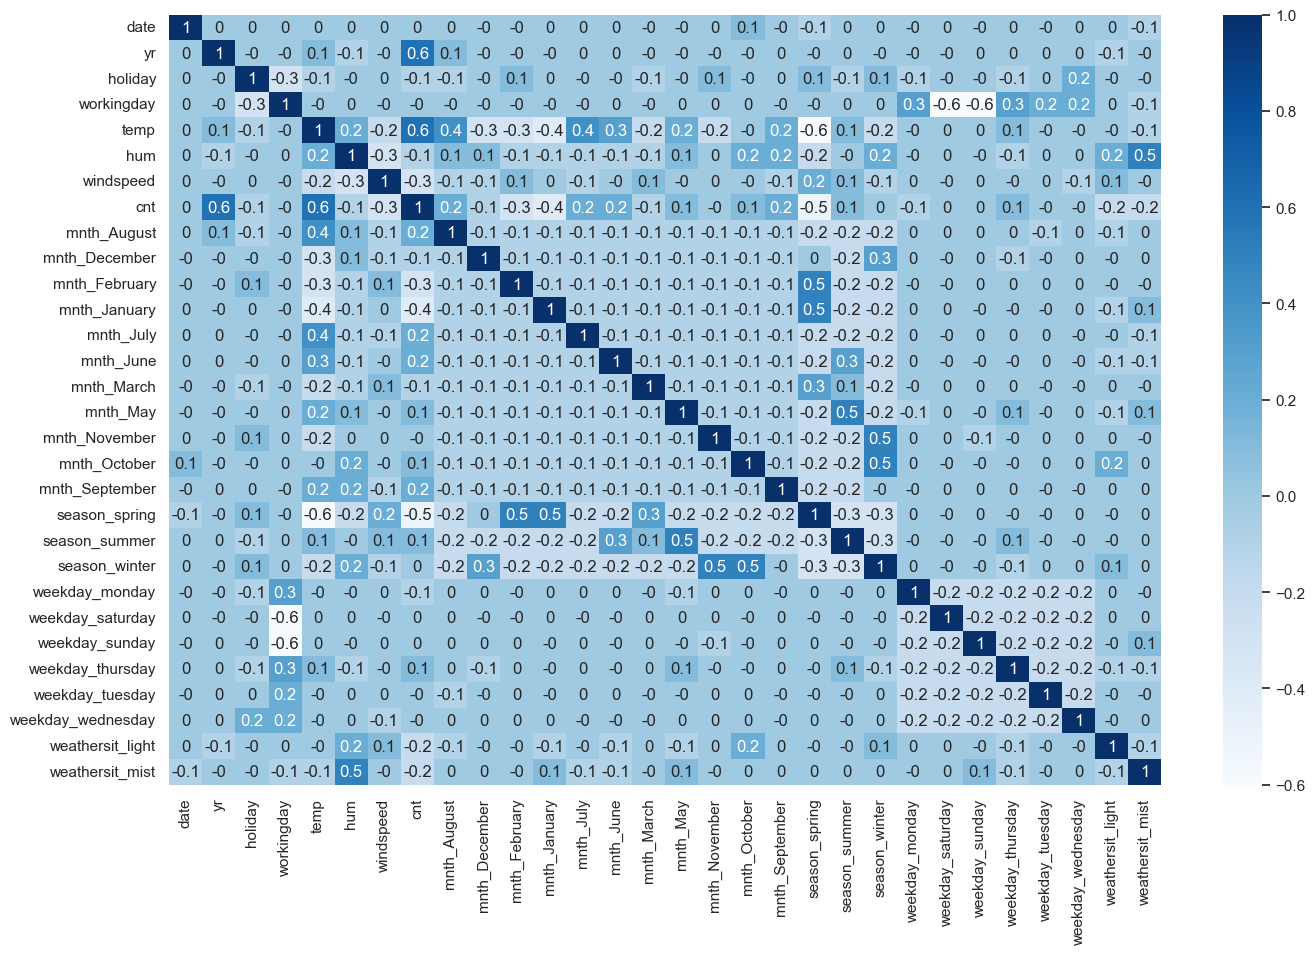

In [882]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Blues')
plt.show()

Registered has high correlation with rides

### Defining Target & Feature Variables for Iterative Modelling Process

In [883]:
# Target Rides cnt

y_train = df_train.pop('cnt')

In [884]:
X_train = df_train

#### We have neary 15-16 feature variable, Lets use RFE(Recursive Feature Elimination)

In [885]:
#VIF
def calc_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

### RFE

In [886]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [887]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select_Status': rfe.support_, 'Ranks': rfe.ranking_})
rfe_df.sort_values(by='Ranks')

,Predictor,Select_Status,Ranks
28,weathersit_mist,True,1
18,season_spring,True,1
17,mnth_September,True,1
15,mnth_November,True,1
27,weathersit_light,True,1
11,mnth_July,True,1
19,season_summer,True,1
8,mnth_December,True,1
10,mnth_January,True,1
6,windspeed,True,1


In [888]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          8.15e-189
Time:                        01:19:59   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3197      0.036      8.859      0.000       0.249       0.391
yr                   0.2304      0.008     28.487      0.000       0.215       0.246
holiday             -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                 0.4815      0.037     13.005      0.000       0.409       0.554
hum                 -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed           -0.1887      0.026     -7.315      0.000      -0.239      -0.138
mnth_December       -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_January        -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_July           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_November       -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_September       0.0755      0.017      4.466      0.000       0.042       0.109
season_spring       -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer        0.0423      0.015      2.761      0.006       0.012       0.072
season_winter        0.1019      0.018      5.656      0.000       0.067       0.137
weathersit_light    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_mist     -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [889]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,hum,30.89
1,temp,17.79
2,windspeed,4.72
3,season_spring,4.37
4,season_winter,4.06
5,season_summer,2.82
6,weathersit_mist,2.32
7,yr,2.09
8,mnth_November,1.85
9,mnth_January,1.75


#### In the above model we see that VIF is highest for Humidity

In [890]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          4.75e-186
Time:                        01:19:59   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2450      0.032      7.618      0.000       0.182       0.308
yr                   0.2345      0.008     28.687      0.000       0.218       0.251
holiday             -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                 0.4387      0.036     12.093      0.000       0.367       0.510
windspeed           -0.1585      0.025     -6.276      0.000      -0.208      -0.109
mnth_December       -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_January        -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_July           -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_November       -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_September       0.0687      0.017      4.015      0.000       0.035       0.102
season_spring       -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer        0.0349      0.015      2.251      0.025       0.004       0.065
season_winter        0.0869      0.018      4.831      0.000       0.052       0.122
weathersit_light    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_mist     -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [891]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,5.17
1,windspeed,4.67
2,season_winter,2.95
3,season_spring,2.89
4,season_summer,2.24
5,yr,2.07
6,mnth_November,1.81
7,mnth_January,1.66
8,mnth_July,1.59
9,weathersit_mist,1.57


p-value is good for all predictor and the VIF is at below 5 for all except temp.

In [892]:
col = col.drop(['temp'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          1.82e-159
Time:                        01:19:59   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5954      0.016     37.460      0.000       0.564       0.627
yr                   0.2457      0.009     26.616      0.000       0.228       0.264
holiday             -0.0855      0.030     -2.887      0.004      -0.144      -0.027
windspeed           -0.1902      0.029     -6.662      0.000      -0.246      -0.134
mnth_December       -0.1086      0.019     -5.660      0.000      -0.146      -0.071
mnth_January        -0.1202      0.020     -6.056      0.000      -0.159      -0.081
mnth_July           -0.0182      0.021     -0.875      0.382      -0.059       0.023
mnth_November       -0.0995      0.021     -4.731      0.000      -0.141      -0.058
mnth_September       0.0534      0.019      2.750      0.006       0.015       0.092
season_spring       -0.2503      0.018    -14.125      0.000      -0.285      -0.216
season_summer       -0.0497      0.016     -3.160      0.002      -0.081      -0.019
season_winter       -0.0231      0.018     -1.307      0.192      -0.058       0.012
weathersit_light    -0.3117      0.028    -11.150      0.000      -0.367      -0.257
weathersit_mist     -0.0869      0.010     -8.800      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       56.274   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.272
Skew:                          -0.588   Prob(JB):                     1.89e-29
Kurtosis:                       5.200   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value of month july is high. lets drop it.

In [893]:
col = col.drop(['mnth_July']) # 0.382 - p-value

X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.08e-160
Time:                        01:19:59   Log-Likelihood:                 438.45
No. Observations:                 510   AIC:                            -850.9
Df Residuals:                     497   BIC:                            -795.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5886      0.014     42.474      0.000       0.561       0.616
yr                   0.2458      0.009     26.633      0.000       0.228       0.264
holiday             -0.0852      0.030     -2.877      0.004      -0.143      -0.027
windspeed           -0.1901      0.029     -6.659      0.000      -0.246      -0.134
mnth_December       -0.1081      0.019     -5.635      0.000      -0.146      -0.070
mnth_January        -0.1201      0.020     -6.057      0.000      -0.159      -0.081
mnth_November       -0.0987      0.021     -4.699      0.000      -0.140      -0.057
mnth_September       0.0586      0.018      3.172      0.002       0.022       0.095
season_spring       -0.2439      0.016    -15.125      0.000      -0.276      -0.212
season_summer       -0.0432      0.014     -3.116      0.002      -0.070      -0.016
season_winter       -0.0173      0.016     -1.058      0.290      -0.050       0.015
weathersit_light    -0.3118      0.028    -11.156      0.000      -0.367      -0.257
weathersit_mist     -0.0863      0.010     -8.762      0.000      -0.106      -0.067
==============================================================================
Omnibus:                       56.410   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.512
Skew:                          -0.592   Prob(JB):                     2.77e-29
Kurtosis:                       5.188   Cond. No.                         8.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [894]:
col = col.drop(['season_winter']) # 0.290 p-value
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.71e-161
Time:                        01:19:59   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5834      0.013     44.987      0.000       0.558       0.609
yr                   0.2459      0.009     26.646      0.000       0.228       0.264
holiday             -0.0854      0.030     -2.883      0.004      -0.144      -0.027
windspeed           -0.1910      0.029     -6.694      0.000      -0.247      -0.135
mnth_December       -0.1166      0.017     -6.689      0.000      -0.151      -0.082
mnth_January        -0.1216      0.020     -6.143      0.000      -0.160      -0.083
mnth_November       -0.1101      0.018     -6.120      0.000      -0.145      -0.075
mnth_September       0.0607      0.018      3.304      0.001       0.025       0.097
season_spring       -0.2367      0.015    -16.212      0.000      -0.265      -0.208
season_summer       -0.0374      0.013     -2.937      0.003      -0.062      -0.012
weathersit_light    -0.3155      0.028    -11.374      0.000      -0.370      -0.261
weathersit_mist     -0.0872      0.010     -8.883      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       60.252   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.320
Skew:                          -0.619   Prob(JB):                     2.78e-32
Kurtosis:                       5.303   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [895]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,3.23
1,season_spring,2.37
2,yr,1.74
3,season_summer,1.70
4,mnth_January,1.62
5,weathersit_mist,1.48
6,mnth_November,1.23
7,mnth_September,1.16
8,mnth_December,1.13
9,weathersit_light,1.07


#### We got our best model

 ### Linear Regrssion Assumptions

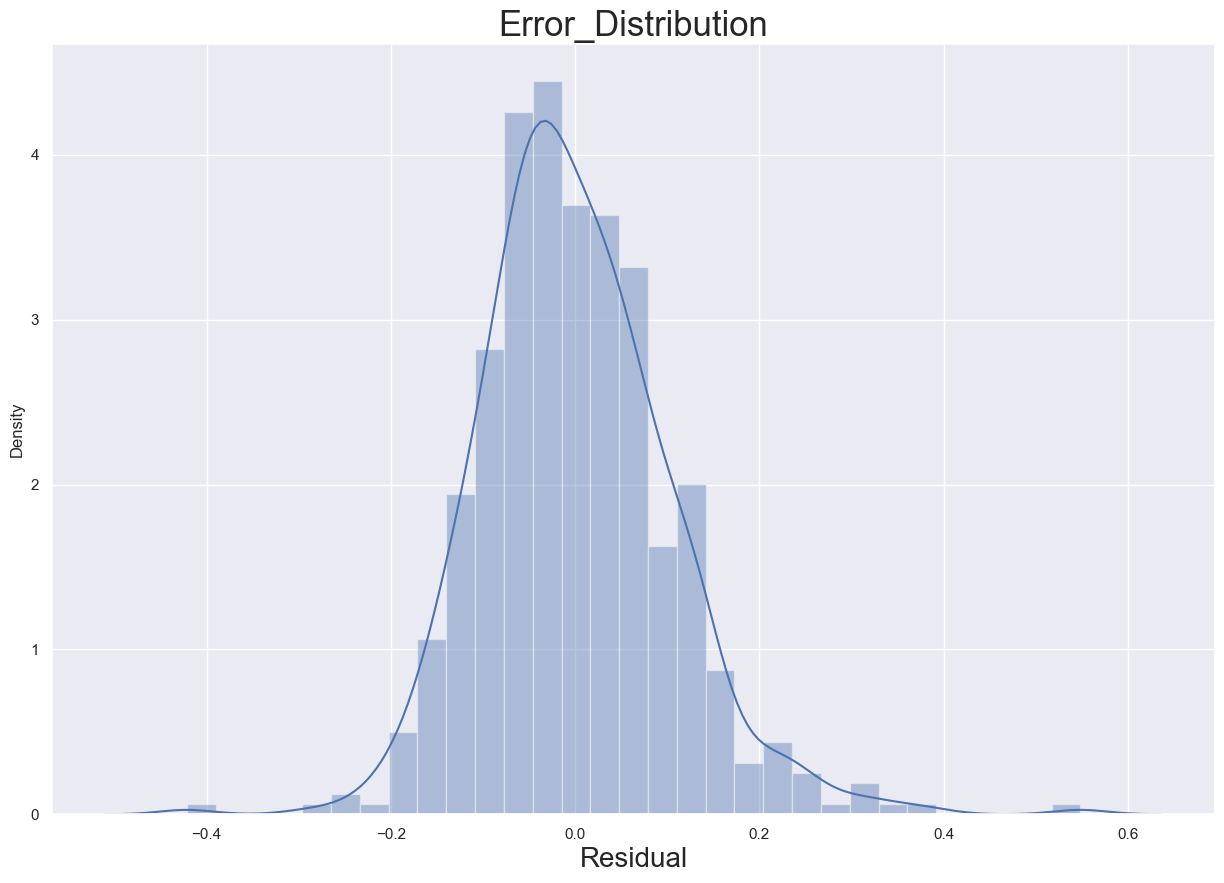

In [896]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual', fontdict={'fontsize': 20})
plt.title('Error_Distribution', fontdict={'fontsize': 25})
plt.show()

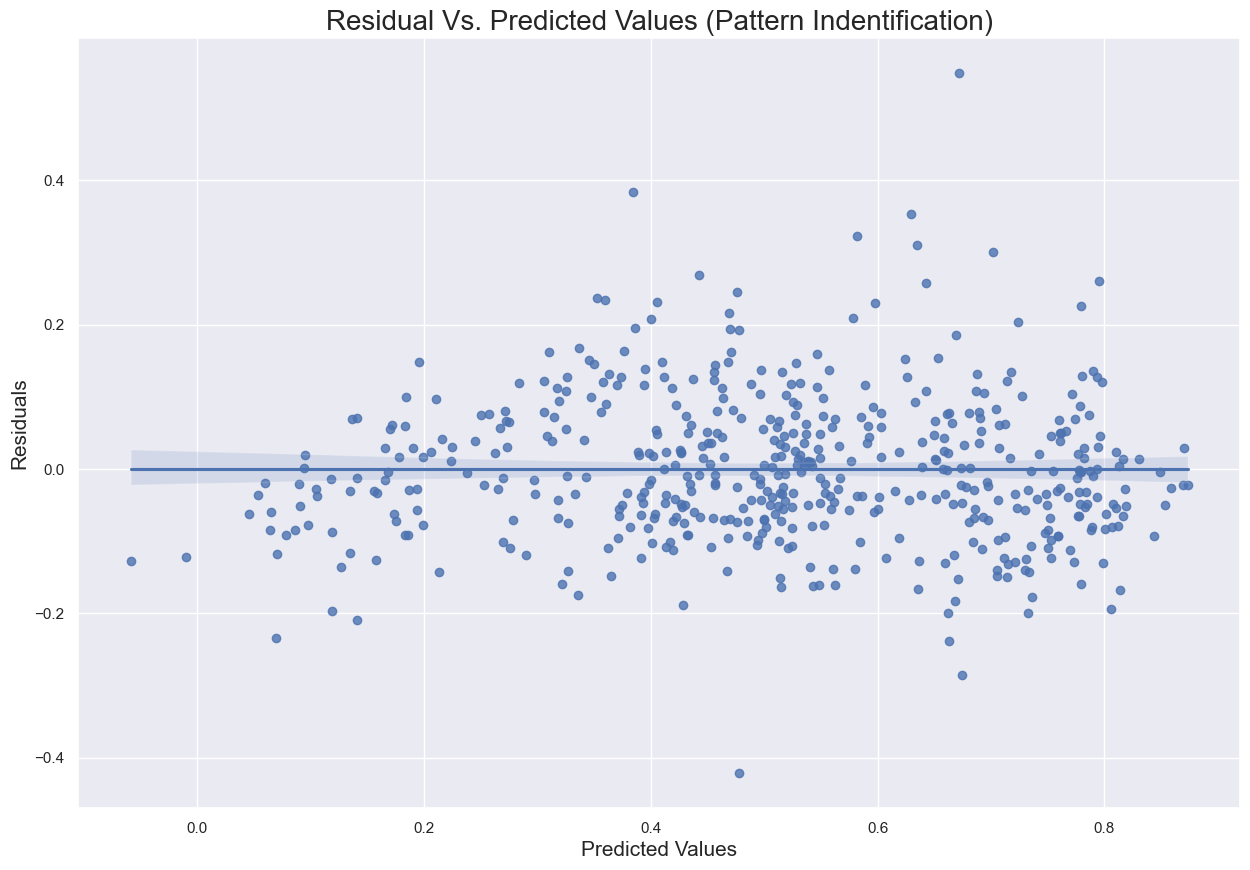

In [897]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [898]:
print("Pearson Value: ", pearsonr(y_train_pred, residual)[0])

Pearson Value:  1.9914625504213745e-15


value nearing to zero, we could see no orelation between residual and predicted value

In [899]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,3.23
1,season_spring,2.37
2,yr,1.74
3,season_summer,1.70
4,mnth_January,1.62
5,weathersit_mist,1.48
6,mnth_November,1.23
7,mnth_September,1.16
8,mnth_December,1.13
9,weathersit_light,1.07


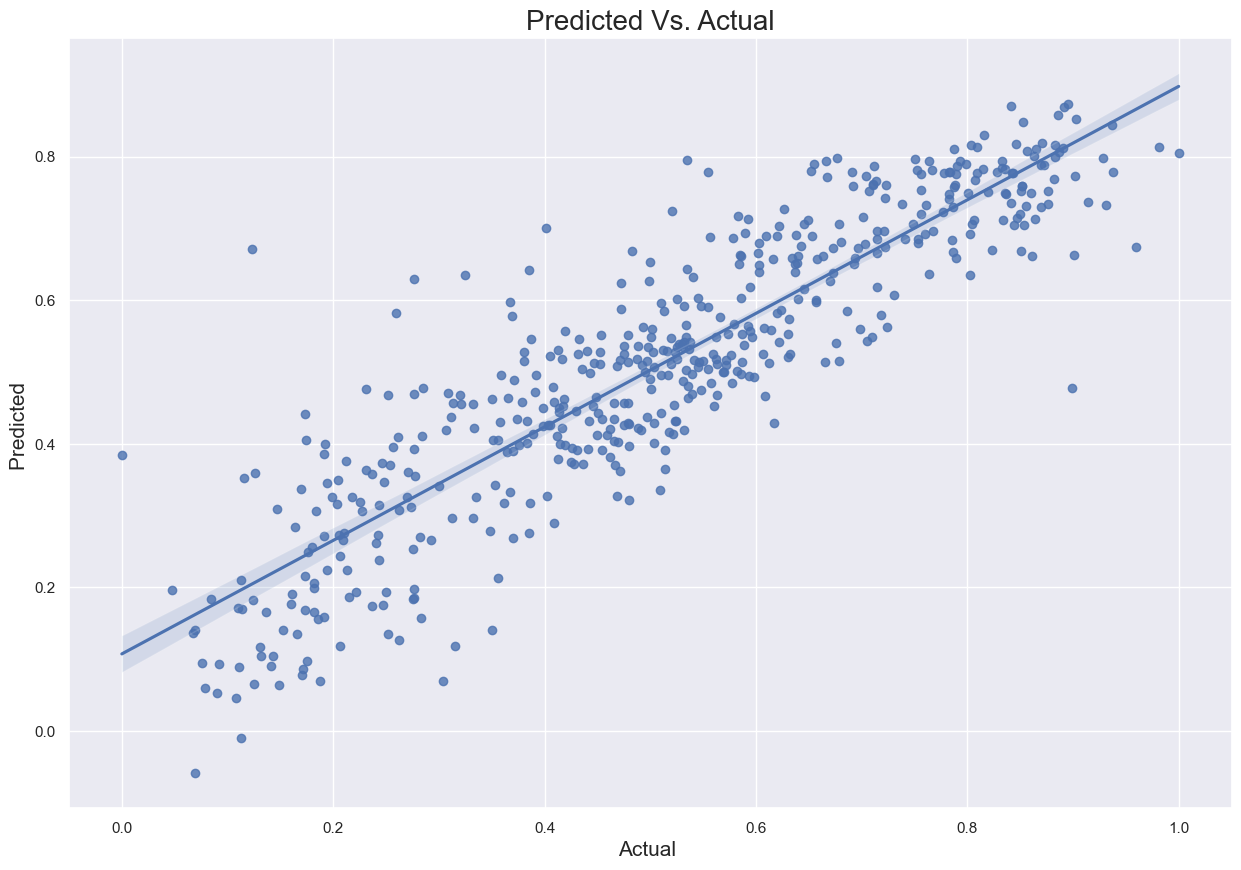

In [900]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Vs. Actual', fontdict={'fontsize': 20})
plt.xlabel('Actual ', fontdict={'fontsize': 15})
plt.ylabel('Predicted ', fontdict={'fontsize': 15})
plt.show()

Evaluate correlation Co-ef

In [901]:
corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0], 2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
yr,0.59
season_spring,-0.55
mnth_January,-0.38
windspeed,-0.25
weathersit_light,-0.23
mnth_September,0.20
weathersit_mist,-0.17
mnth_December,-0.14
season_summer,0.14
holiday,-0.10


### Prediction: Test Data

In [902]:
df_test[numerical] = scaler.transform(df_test[numerical])
df_test.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
185,0.100000,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
536,0.633333,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,1,0,0,0,0
300,0.866667,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,0,0,1
222,0.300000,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
153,0.033333,0,0,0,0.817246,0.314298,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,0,0
405,0.266667,1,0,0,0.256524,0.579218,0.326196,0.438104,0,0,...,0,0,0,1,0,0,0,0,0,0
199,0.566667,0,0,1,0.856704,0.671103,0.372990,0.510354,0,0,...,0,0,0,0,0,0,0,1,0,0
172,0.666667,0,0,1,0.774672,0.793903,0.276724,0.553728,0,0,...,0,0,0,0,0,1,0,0,0,1
513,0.900000,1,1,0,0.814131,0.696865,0.331536,0.692706,0,0,...,1,0,0,0,0,0,1,0,0,0


In [903]:
y_test = df_test.pop('cnt')

In [904]:
X_test = df_test

In [905]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [906]:
y_test_pred = lr_model.predict(X_test_new)

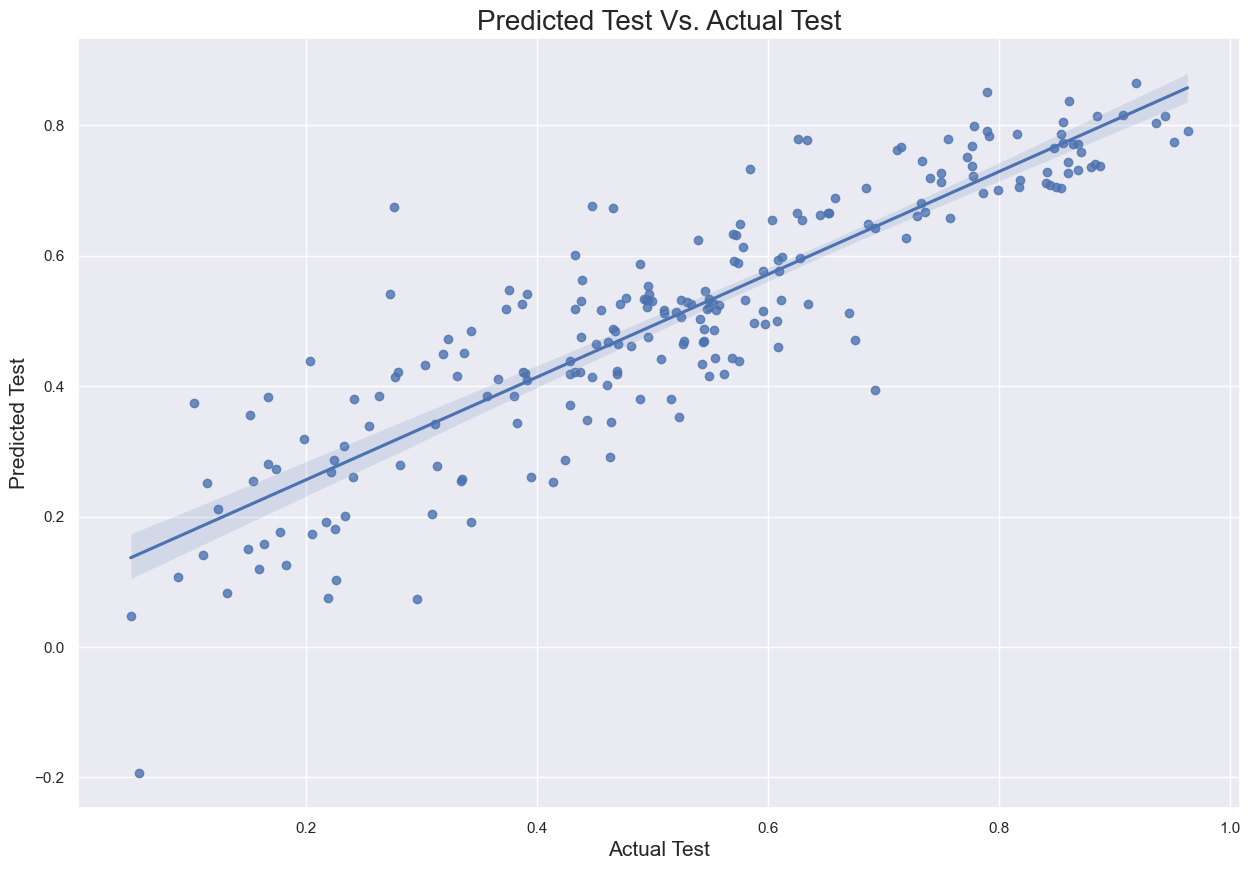

In [907]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Vs. Actual Test', fontdict={'fontsize': 20})
plt.xlabel('Actual Test', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test', fontdict={'fontsize': 15})
plt.show()

In [908]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7790839400465186